## 安裝套件

In [1]:
!pip install requests

In [2]:
!pip install feedparser

In [3]:
!pip install lxml

In [4]:
!pip install jieba

### 下載繁體字的辭典檔

In [5]:
!wget https://github.com/fxsjy/jieba/raw/master/extra_dict/dict.txt.big -O jieba_data/dict.txt.big

'wget' 不是內部或外部命令、可執行的程式或批次檔。


In [6]:
!pip install wordcloud

## 解析 RSS

In [7]:
import feedparser

In [8]:
rss_url = "https://money.udn.com/rssfeed/news/1001/5588/10511?ch=money"

In [9]:
newsFeed = feedparser.parse(rss_url)
newsFeed

{'bozo': False,
 'entries': [{'title': '美參議員推動禁止美政府與陸晶片製造商交易',
   'title_detail': {'type': 'text/plain',
    'language': None,
    'base': 'https://money.udn.com/rssfeed/news/1001/5588/10511?ch=money',
    'value': '美參議員推動禁止美政府與陸晶片製造商交易'},
   'links': [{'rel': 'alternate',
     'type': 'text/html',
     'href': 'https://money.udn.com/money/story/10511/6774388'}],
   'link': 'https://money.udn.com/money/story/10511/6774388',
   'published': 'Fri, 18 Nov 2022 10:19:31 +0800',
   'published_parsed': time.struct_time(tm_year=2022, tm_mon=11, tm_mday=18, tm_hour=2, tm_min=19, tm_sec=31, tm_wday=4, tm_yday=322, tm_isdst=0),
   'summary': '<p><img src="https://pgw.udn.com.tw/gw/photo.php?u=https://uc.udn.com.tw/photo/2022/11/18/realtime/19401533.jpeg&amp;s=Y&amp;x=0&amp;y=0&amp;sw=640&amp;sh=435&amp;sl=W&amp;fw=180&amp;exp=3600" /><p>據美國政治新聞網站Politico援引知情人士指稱，美國民主黨參議院多數黨領袖查克舒默（Chuck Schumer）和共...</p>',
   'summary_detail': {'type': 'text/html',
    'language': None,
    'base': 'https://money

### 查看每個 entry 的 title, url 

In [10]:
i = 1
for e in newsFeed['entries']:
    title = e['title']
    link_url = e['links'][0]['href']
    print("%s, %s, %s"%(i, title, link_url))
    i = i + 1

1, 美參議員推動禁止美政府與陸晶片製造商交易, https://money.udn.com/money/story/10511/6774388
2, 中國在美國設「警察局」 FBI局長：令人非常擔心, https://money.udn.com/money/story/10511/6774337
3, 紐時：台灣議題 拜習犀利交鋒, https://money.udn.com/money/story/10511/6768026
4, 北京畫紅線 對美挑明立場, https://money.udn.com/money/story/10511/6768029
5, 拜登：美中競爭不應變衝突, https://money.udn.com/money/story/10511/6765153
6, 拜習會 扭轉美中關係大考驗, https://money.udn.com/money/story/10511/6765148
7, 拜登會習近平後  美中同意恢復因應氣候變遷合作, https://money.udn.com/money/story/10511/6765388
8, 拜習會後　中美外交、經貿團隊將展開溝通和磋商, https://money.udn.com/money/story/10511/6765035
9, 拜登：美一中政策沒變　不想與陸進行新冷戰, https://money.udn.com/money/story/10511/6765032
10, 拜習會登場 美中競爭畫紅線, https://money.udn.com/money/story/10511/6762564
11, 美方對拜習會的重要目標：劃定雙方競爭關係「底線」, https://money.udn.com/money/story/10511/6756752
12, 拜習會後  白宮將向台灣簡報, https://money.udn.com/money/story/10511/6756697
13, 拜登、習近平要見面了！美國家安全顧問：將向台灣通報拜習會結果, https://money.udn.com/money/story/10511/6756614


### 解析html可以參考 https://lxml.de/lxmlhtml.html

## 開始取得文章

### 載入 library

In [11]:
import requests
from lxml import etree
from io import StringIO
import jieba
import pandas as pd
import time
import random

### 使用繁體辭典

In [12]:
#指定辭典檔
jieba.set_dictionary('jieba_data/dict.txt.big')

### 設定 request header

In [13]:
#設定 request header
user_agent = "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/63.0.3239.132 Safari/537.36"
my_headers = {
    'User-Agent': user_agent,
    "accept": "text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8",
    "accept-Language": "zh-TW,zh;q=0.9,en-US;q=0.8,en;q=0.7",
    "accept-encoding": "gzip, deflate, br",
    "Connection": "keep-alive",
    "cache-control": "no-cache",
    "Accept-Charset": "UTF8,utf-8;q=0.7,*;q=0.7"
}

### 先爬文

In [14]:
#分解動作

#爬文
each_article_text_list = []
for e in newsFeed['entries']:
    url = e['links'][0]['href']
    print(url)
    r = requests.get(url, headers = my_headers)
    if r.status_code == 200:
        parse_tree = etree.parse(StringIO(r.text), etree.HTMLParser())
        article_elements = parse_tree.xpath('//*[@id="article_body"]//p')
        for a_part in article_elements:  #檢查是否為文字而非節點(廣告)
            if type(a_part.text) is str:
                each_article_text_list.append(a_part.text.strip())
        sleep_time = random.randint(3,10)
        print("sleep time: %s sec"%(sleep_time))
        time.sleep(sleep_time)
    all_article_text = ''.join(each_article_text_list)
all_article_text

https://money.udn.com/money/story/10511/6774388
sleep time: 8 sec
https://money.udn.com/money/story/10511/6774337
sleep time: 6 sec
https://money.udn.com/money/story/10511/6768026
sleep time: 6 sec
https://money.udn.com/money/story/10511/6768029
sleep time: 3 sec
https://money.udn.com/money/story/10511/6765153
sleep time: 5 sec
https://money.udn.com/money/story/10511/6765148
sleep time: 9 sec
https://money.udn.com/money/story/10511/6765388
sleep time: 10 sec
https://money.udn.com/money/story/10511/6765035
sleep time: 4 sec
https://money.udn.com/money/story/10511/6765032
sleep time: 10 sec
https://money.udn.com/money/story/10511/6762564
sleep time: 4 sec
https://money.udn.com/money/story/10511/6756752
sleep time: 7 sec
https://money.udn.com/money/story/10511/6756697
sleep time: 5 sec
https://money.udn.com/money/story/10511/6756614
sleep time: 7 sec


'據美國政治新聞網站Politico援引知情人士指稱，美國民主黨參議院多數黨領袖查克舒默（Chuck Schumer）和共和黨參議員約翰科寧（John Cornyn）正在努力遊說美國政府禁止與中國大陸晶片製造商展開業務。據路透社，相關報告稱，參議員們希望將他們的修正案納入今年美國國防授權法案 (NDAA) 的最終版本，該修正案阻止聯邦政府獲得中國公司製造的半導體產品和服務。據Politico稱，該措施將擴大第889條中已經禁止政府機構與使用其技術的中國電信公司或承包商開展業務的條款。2023財年美國國防授權法案必須在今年晚些時候通過參議院和眾議院，然後才能送交白宮供美國總統拜登簽署成為法律。上個月，拜登政府已公布一套全面的出口管制措施，限制先進晶片及相關技術、設備出口中國大陸。此次新限令影響範圍廣泛，為拜登政府迄今最激進的管制措施，其影響可能超出半導體領域，並延伸到電動車、航太及智慧手機等需高效能運算的產業。美國聯邦調查局（FBI）局長瑞伊 (Christopher Wray) 今天對國會議員表示，對於中國政府在美國城市設立未經授權的「警察局」，可能進行具影響力的行動深感擔憂。路透社報導，總部設在歐洲的人權組織「保護衛士」（Safeguard Defenders）9月發布一份報告，披露中國在紐約等世界各大城市設有數十個「警僑事務海外服務站」。共和黨國會議員對拜登政府已提出要求，就中國影響力作出答覆。保護衛士的報告指出，中國政府將觸角延伸到海外，設立這些服務站向在海外的若干中國公民或其親屬施壓，強迫他們返回中國接受刑事指控。保護衛士還認為這些服務站與中共中央統一戰線工作部的活動有關聯。中央統一戰線工作部是負責向海外傳播其影響力和宣傳的共產黨機構。瑞伊在美國參議院國土安全與政府事務委員會作證時表示：「我對此非常擔心，我們知道這些服務站的存在。」他承認FBI已針對這個問題展開調查，但拒絕詳細說明。他說：「但對我來說，中國警方在沒有適當協調的情況下，試圖在紐約開設服務站，這種行為令人無法接受。這侵犯了主權，並規避標準的司法和執法合作程序。」共和黨參議員史考特（Senator Rick Scott）質問這些服務站是否違反美國法律時，瑞伊說FBI正在調查。中國駐華盛頓大使館沒有立即回應置評請求。在荷蘭當局進行調查後，中國外交部本月初否認在荷蘭設有此類服務站。中國稱在荷蘭設立的辦

### 做分詞

In [15]:
#分詞
seg_words_list = jieba.lcut(all_article_text)
seg_words_list

Building prefix dict from C:\Python_Class\textmining\2019_nlp-master\work\Text_wordcloud\jieba_data\dict.txt.big ...
Loading model from cache C:\Users\TIBAME~1\AppData\Local\Temp\jieba.ue9a290ab18f67135df79c8a1d32de9c7.cache
Loading model cost 5.786 seconds.
Prefix dict has been built successfully.


['據',
 '美國',
 '政治',
 '新聞',
 '網站',
 'Politico',
 '援引',
 '知情',
 '人士',
 '指稱',
 '，',
 '美國民主黨',
 '參議院',
 '多數黨',
 '領袖',
 '查克',
 '舒默',
 '（',
 'Chuck',
 ' ',
 'Schumer',
 '）',
 '和',
 '共和黨',
 '參議員',
 '約翰',
 '科寧',
 '（',
 'John',
 ' ',
 'Cornyn',
 '）',
 '正在',
 '努力',
 '遊說',
 '美國政府',
 '禁止',
 '與',
 '中國',
 '大陸',
 '晶片',
 '製造商',
 '展開',
 '業務',
 '。',
 '據',
 '路透社',
 '，',
 '相關',
 '報告',
 '稱',
 '，',
 '參議員',
 '們',
 '希望',
 '將',
 '他們',
 '的',
 '修正案',
 '納入',
 '今年',
 '美國',
 '國防',
 '授權',
 '法案',
 ' ',
 '(',
 'NDAA',
 ')',
 ' ',
 '的',
 '最終',
 '版本',
 '，',
 '該',
 '修正案',
 '阻止',
 '聯邦政府',
 '獲得',
 '中國',
 '公司',
 '製造',
 '的',
 '半導體',
 '產品',
 '和',
 '服務',
 '。',
 '據',
 'Politico',
 '稱',
 '，',
 '該',
 '措施',
 '將',
 '擴大',
 '第',
 '889',
 '條中',
 '已經',
 '禁止',
 '政府',
 '機構',
 '與',
 '使用',
 '其',
 '技術',
 '的',
 '中國電信',
 '公司',
 '或',
 '承包商',
 '開展業務',
 '的',
 '條款',
 '。',
 '2023',
 '財年',
 '美國',
 '國防',
 '授權',
 '法案',
 '必須',
 '在',
 '今年',
 '晚些時候',
 '通過',
 '參議院',
 '和眾',
 '議院',
 '，',
 '然後',
 '才能',
 '送交',
 '白宮',
 '供',
 '美國',
 '總統',
 '拜登',
 '簽署',
 '成為',


In [16]:
!ls jieba_data

'ls' 不是內部或外部命令、可執行的程式或批次檔。


### 準備 stop word

In [17]:
#stop word
with open(file='jieba_data/stop_words.txt', mode='r', encoding='utf-8') as file:
    stop_words = file.read().split('\n')
stop_words

['the',
 'of',
 'is',
 'and',
 'to',
 'in',
 'that',
 'we',
 'for',
 'an',
 'are',
 'by',
 'be',
 'as',
 'on',
 'with',
 'can',
 'if',
 'from',
 'which',
 'you',
 'it',
 'this',
 'then',
 'at',
 'have',
 'all',
 'not',
 'one',
 'has',
 'or',
 'that',
 '的',
 '了',
 '和',
 '是',
 '就',
 '都',
 '而',
 '及',
 '與',
 '著',
 '或',
 '一個',
 '沒有',
 '我們',
 '你們',
 '妳們',
 '他們',
 '她們',
 '是否',
 '(',
 ')',
 '[',
 ']',
 '《',
 '》',
 '；',
 '『',
 '』',
 '：',
 ' ',
 '’',
 '（',
 '）',
 '、',
 '」',
 '「',
 '。',
 '，',
 '在',
 '他',
 '日',
 '對',
 '不',
 '她',
 '為',
 '也',
 '會',
 '等',
 '已',
 '從',
 '自己',
 '認為',
 '但',
 '說',
 '第',
 '上',
 '將',
 '到',
 '月',
 '人',
 '中',
 '時',
 '有',
 '約',
 '被',
 '年',
 '可能',
 '報導',
 '更',
 '並',
 '我']

### 準備一個利用stop word過濾後的分詞結果

In [18]:
#分詞
seg_stop_words_list = []
seg_words_list = jieba.lcut(all_article_text)
for term in seg_words_list:
    if term not in stop_words:
        seg_stop_words_list.append(term)
seg_stop_words_list

['據',
 '美國',
 '政治',
 '新聞',
 '網站',
 'Politico',
 '援引',
 '知情',
 '人士',
 '指稱',
 '美國民主黨',
 '參議院',
 '多數黨',
 '領袖',
 '查克',
 '舒默',
 'Chuck',
 'Schumer',
 '共和黨',
 '參議員',
 '約翰',
 '科寧',
 'John',
 'Cornyn',
 '正在',
 '努力',
 '遊說',
 '美國政府',
 '禁止',
 '中國',
 '大陸',
 '晶片',
 '製造商',
 '展開',
 '業務',
 '據',
 '路透社',
 '相關',
 '報告',
 '稱',
 '參議員',
 '們',
 '希望',
 '修正案',
 '納入',
 '今年',
 '美國',
 '國防',
 '授權',
 '法案',
 'NDAA',
 '最終',
 '版本',
 '該',
 '修正案',
 '阻止',
 '聯邦政府',
 '獲得',
 '中國',
 '公司',
 '製造',
 '半導體',
 '產品',
 '服務',
 '據',
 'Politico',
 '稱',
 '該',
 '措施',
 '擴大',
 '889',
 '條中',
 '已經',
 '禁止',
 '政府',
 '機構',
 '使用',
 '其',
 '技術',
 '中國電信',
 '公司',
 '承包商',
 '開展業務',
 '條款',
 '2023',
 '財年',
 '美國',
 '國防',
 '授權',
 '法案',
 '必須',
 '今年',
 '晚些時候',
 '通過',
 '參議院',
 '和眾',
 '議院',
 '然後',
 '才能',
 '送交',
 '白宮',
 '供',
 '美國',
 '總統',
 '拜登',
 '簽署',
 '成為',
 '法律',
 '上個月',
 '拜登',
 '政府',
 '公布',
 '一套',
 '全面',
 '出口',
 '管制',
 '措施',
 '限制',
 '先進',
 '晶片',
 '相關',
 '技術',
 '設備',
 '出口',
 '中國',
 '大陸',
 '此次',
 '新',
 '限令',
 '影響',
 '範圍',
 '廣泛',
 '拜登',
 '政府',
 '迄今',
 '最',
 '激

In [19]:
#合併動作 XD
each_article_text_list = []
seg_words_list = []
for e in newsFeed['entries']:
    url = e['links'][0]['href']
    print(url)
    r = requests.get(url, headers = my_headers)
    if r.status_code == 200:
        parse_tree = etree.parse(StringIO(r.text), etree.HTMLParser())
        article_elements = parse_tree.xpath('//article//p')
        for a_part in article_elements:
            if type(a_part.text) is str:
                term = a_part.text.strip()
                if term not in stop_words:
                    each_article_text_list.append(term)
        all_article_text += ''.join(each_article_text_list)
        sleep_time = random.randint(3,10)
        print("sleep time: %s sec"%(sleep_time))
        time.sleep(sleep_time)
seg_words_list = jieba.lcut(all_article_text)
seg_df = pd.DataFrame(seg_words_list, columns=['seg_word'])
print(seg_df)

https://money.udn.com/money/story/10511/6774388
sleep time: 9 sec
https://money.udn.com/money/story/10511/6774337
sleep time: 9 sec
https://money.udn.com/money/story/10511/6768026
sleep time: 7 sec
https://money.udn.com/money/story/10511/6768029
sleep time: 10 sec
https://money.udn.com/money/story/10511/6765153
sleep time: 8 sec
https://money.udn.com/money/story/10511/6765148
sleep time: 3 sec
https://money.udn.com/money/story/10511/6765388
sleep time: 3 sec
https://money.udn.com/money/story/10511/6765035
sleep time: 4 sec
https://money.udn.com/money/story/10511/6765032
sleep time: 3 sec
https://money.udn.com/money/story/10511/6762564
sleep time: 5 sec
https://money.udn.com/money/story/10511/6756752
sleep time: 5 sec
https://money.udn.com/money/story/10511/6756697
sleep time: 5 sec
https://money.udn.com/money/story/10511/6756614
sleep time: 10 sec
      seg_word
0            據
1           美國
2           政治
3           新聞
4           網站
...        ...
33690        ，
33691       請勿
33692

### 載入繪圖相關的 library

In [20]:
import matplotlib
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
print(matplotlib.matplotlib_fname())

C:\Users\Tibame_T14\anaconda3\lib\site-packages\matplotlib\mpl-data\matplotlibrc


### 安裝中文字型

In [21]:
!ls fonts/*.ttf

'ls' 不是內部或外部命令、可執行的程式或批次檔。


In [22]:
#!cat /opt/conda/lib/python3.7/site-packages/matplotlib/mpl-data/matplotlibrc

#### 字型檔案是放在 /opt/conda/lib/python3.7/site-packages/matplotlib/mpl-data/fonts/ttf 我們先列出來看一下

In [23]:
!ls /opt/conda/lib/python3.7/site-packages/matplotlib/mpl-data/fonts/ttf

'ls' 不是內部或外部命令、可執行的程式或批次檔。


#### 將中文字型檔案放到字型收容的路徑

In [24]:
!cp fonts/*.ttf /opt/conda/lib/python3.7/site-packages/matplotlib/mpl-data/fonts/ttf 

'cp' 不是內部或外部命令、可執行的程式或批次檔。


#### 檢查一下結果

In [25]:
!ls /opt/conda/lib/python3.7/site-packages/matplotlib/mpl-data/fonts/ttf

'ls' 不是內部或外部命令、可執行的程式或批次檔。


#### 清除 matplotlib 快取

In [26]:
print(matplotlib.get_configdir())

C:\Users\Tibame_T14\.matplotlib


In [27]:
!ls -la /home/jovyan/.config/matplotlib

'ls' 不是內部或外部命令、可執行的程式或批次檔。


In [28]:
print(matplotlib.get_cachedir())

C:\Users\Tibame_T14\.matplotlib


In [29]:
!rm -rf /home/jovyan/.cache/matplotlib

'rm' 不是內部或外部命令、可執行的程式或批次檔。


In [30]:
#用來顯示中文
plt.rcParams['font.sans-serif']=['SimHei']
#用來顯示負號
plt.rcParams['axes.unicode_minus']=False

#### 其他 FAQ 可以參考 https://matplotlib.org/3.1.1/faq/troubleshooting_faq.html

### 繪製文字雲 ( wordcloud.generate )

In [31]:
# wordcloud.generate 參數是吃文字內容，以空白為文字區隔
seg_words = ' '.join(seg_words_list)
#seg_words

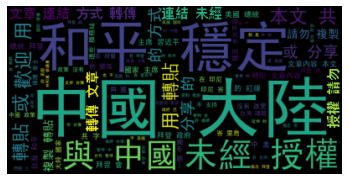

In [32]:
#不同字型
wordcloud = WordCloud(font_path='fonts/SimHei.ttf').generate(seg_words)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

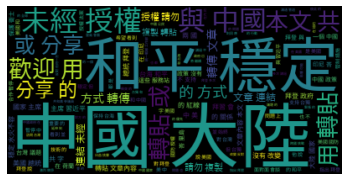

In [33]:
#不同字型
wordcloud = WordCloud(font_path='fonts/TaipeiSansTCBeta-Regular.ttf').generate(seg_words)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

### 繪製文字雲 ( wordcloud.generate_from_frequencies )

In [34]:
# https://docs.python.org/zh-tw/3/library/collections.html
# 準備一個沒有經過stop word 處理的 counter
from collections import Counter
seg_counter = Counter(seg_words_list)
seg_counter

Counter({'據': 50,
         '美國': 424,
         '政治': 32,
         '新聞': 17,
         '網站': 14,
         'Politico': 28,
         '援引': 14,
         '知情': 14,
         '人士': 32,
         '指稱': 14,
         '，': 2278,
         '美國民主黨': 14,
         '參議院': 33,
         '多數黨': 14,
         '領袖': 41,
         '查克': 14,
         '舒默': 14,
         '（': 143,
         'Chuck': 14,
         ' ': 256,
         'Schumer': 14,
         '）': 143,
         '和': 294,
         '共和黨': 40,
         '參議員': 41,
         '約翰': 14,
         '科寧': 14,
         'John': 14,
         'Cornyn': 14,
         '正在': 44,
         '努力': 22,
         '遊說': 14,
         '美國政府': 18,
         '禁止': 28,
         '與': 292,
         '中國': 436,
         '大陸': 224,
         '晶片': 48,
         '製造商': 14,
         '展開': 79,
         '業務': 14,
         '。': 1044,
         '路透社': 27,
         '相關': 47,
         '報告': 40,
         '稱': 53,
         '們': 14,
         '希望': 110,
         '將': 124,
         '他們': 35,
         '的': 13

In [35]:
# 準備一個有經過stop word 處理的 counter
from collections import Counter
seg_stop_counter = Counter(seg_stop_words_list)
#seg_stop_counter

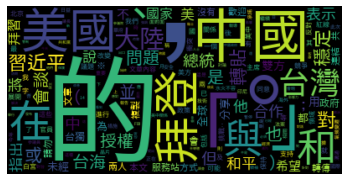

In [36]:
#沒有處理stop words
wordcloud = WordCloud(font_path='fonts/TaipeiSansTCBeta-Regular.ttf').generate_from_frequencies(seg_counter)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

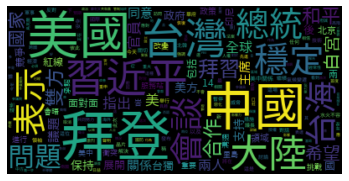

In [37]:
#有處理stop words
wordcloud = WordCloud(font_path='fonts/TaipeiSansTCBeta-Regular.ttf').generate_from_frequencies(seg_stop_counter)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
# plt.savefig(result.png)
plt.show()
# plt.close()

### [其他] 用dataframe 處理數據

In [38]:
seg_df = pd.DataFrame(seg_words_list, columns=['seg_word'])
seg_df

,seg_word
0,據
1,美國
2,政治
3,新聞
4,網站
...,...
33690,，
33691,請勿
33692,複製
33693,轉貼


In [39]:
seg_df['count'] = 1
seg_freq_df = seg_df.groupby('seg_word').sum()
seg_freq_df

,count
seg_word,
,256
(,27
),27
-,3
......,4
...,...
）,143
，,2278
－,11


findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
C:\Users\Tibame_T14\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 12289 (\N{IDEOGRAPHIC COMMA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Tibame_T14\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 12290 (\N{IDEOGRAPHIC FULL STOP}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Tibame_T14\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 12298 (\N{LEFT DOUBLE ANGLE BRACKET}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Tibame_T14\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 12299 (\N{RIGHT DOUBLE ANGLE BRACKET}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\U

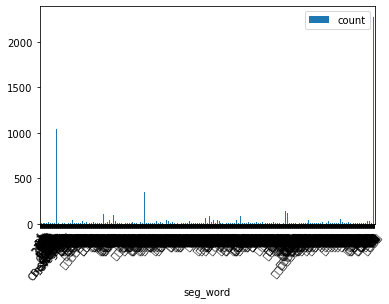

In [40]:
seg_df.groupby('seg_word').sum().plot.bar()
plt.xticks(rotation=50)
plt.show()

### [其他] parse html 小筆記

In [41]:
import requests
from lxml import etree
import jieba
from io import StringIO
import pandas as pd

for e in newsFeed['entries']:
    url = e['links'][0]['href']
    print(url)
    r = requests.get(url)
    #print(r.status_code == 200)
    if r.status_code == 200:
        html_tree = etree.HTML(r.text)
        print(html_tree)
        html_ele = html_tree.xpath('//article//p')
        all_ele = [ (ele.text.strip()) for ele in html_ele if type(ele.text) is str ]
        all_ele_string = ''.join(all_ele)
        seg_words = jieba.lcut(all_ele_string)
        seg_df = pd.DataFrame(seg_words, columns=['seg_word'])
        seg_df['count'] = 1
        print(seg_df)

https://money.udn.com/money/story/10511/6774388
<Element html at 0x244fe7a3a40>
    seg_word  count
0         本文      1
1          共      1
2        409      1
3         字據      1
4         美國      1
..       ...    ...
229        ，      1
230       請勿      1
231       複製      1
232       轉貼      1
233     文章內容      1

[234 rows x 2 columns]
https://money.udn.com/money/story/10511/6774337
<Element html at 0x244fe81f4c0>
    seg_word  count
0         本文      1
1          共      1
2        731      1
3          字      1
4    美國聯邦調查局      1
..       ...    ...
406        ，      1
407       請勿      1
408       複製      1
409       轉貼      1
410     文章內容      1

[411 rows x 2 columns]
https://money.udn.com/money/story/10511/6768026
<Element html at 0x244f6211d80>
    seg_word  count
0         本文      1
1          共      1
2        382      1
3          字      1
4         美國      1
..       ...    ...
246        ，      1
247       請勿      1
248       複製      1
249       轉貼      1
250     文章內容